In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv(r'/content/drive/MyDrive/cicddos2019_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
1,1,17,2,2,0,802.0,0.0,401.0,401.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
2,2,17,48,2,0,766.0,0.0,383.0,383.0,383.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
3,3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
4,4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431371 entries, 0 to 431370
Data columns (total 80 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                431371 non-null  int64  
 1   Protocol                  431371 non-null  int64  
 2   Flow Duration             431371 non-null  int64  
 3   Total Fwd Packets         431371 non-null  int64  
 4   Total Backward Packets    431371 non-null  int64  
 5   Fwd Packets Length Total  431371 non-null  float64
 6   Bwd Packets Length Total  431371 non-null  float64
 7   Fwd Packet Length Max     431371 non-null  float64
 8   Fwd Packet Length Min     431371 non-null  float64
 9   Fwd Packet Length Mean    431371 non-null  float64
 10  Fwd Packet Length Std     431371 non-null  float64
 11  Bwd Packet Length Max     431371 non-null  float64
 12  Bwd Packet Length Min     431371 non-null  float64
 13  Bwd Packet Length Mean    431371 non-null  f

In [ ]:
df_unique = df.nunique()
df_unique_1 = df_unique[df_unique == 1].index.tolist()
df = df.drop(df_unique_1, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431371 entries, 0 to 431370
Data columns (total 68 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                431371 non-null  int64  
 1   Protocol                  431371 non-null  int64  
 2   Flow Duration             431371 non-null  int64  
 3   Total Fwd Packets         431371 non-null  int64  
 4   Total Backward Packets    431371 non-null  int64  
 5   Fwd Packets Length Total  431371 non-null  float64
 6   Bwd Packets Length Total  431371 non-null  float64
 7   Fwd Packet Length Max     431371 non-null  float64
 8   Fwd Packet Length Min     431371 non-null  float64
 9   Fwd Packet Length Mean    431371 non-null  float64
 10  Fwd Packet Length Std     431371 non-null  float64
 11  Bwd Packet Length Max     431371 non-null  float64
 12  Bwd Packet Length Min     431371 non-null  float64
 13  Bwd Packet Length Mean    431371 non-null  f

In [ ]:
for i in df.columns:
  print(i," ",df[i].nunique())

Unnamed: 0   306201
Protocol   3
Flow Duration   160843
Total Fwd Packets   354
Total Backward Packets   454
Fwd Packets Length Total   6024
Bwd Packets Length Total   6226
Fwd Packet Length Max   2504
Fwd Packet Length Min   1133
Fwd Packet Length Mean   10027
Fwd Packet Length Std   11017
Bwd Packet Length Max   1321
Bwd Packet Length Min   240
Bwd Packet Length Mean   8925
Bwd Packet Length Std   9696
Flow Bytes/s   242803
Flow Packets/s   206423
Flow IAT Mean   216824
Flow IAT Std   286711
Flow IAT Max   133742
Flow IAT Min   3829
Fwd IAT Total   145092
Fwd IAT Mean   197146
Fwd IAT Std   263230
Fwd IAT Max   116724
Fwd IAT Min   789
Bwd IAT Total   43625
Bwd IAT Mean   44008
Bwd IAT Std   44272
Bwd IAT Max   42244
Bwd IAT Min   118
Fwd PSH Flags   2
Fwd Header Length   3205
Bwd Header Length   1090
Fwd Packets/s   205422
Bwd Packets/s   76177
Packet Length Min   1082
Packet Length Max   2443
Packet Length Mean   14028
Packet Length Std   13924
Packet Length Variance   13923
SYN Fl

In [ ]:
df.drop(columns=['Class'],inplace=True)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'SYN Flag Count',
       'RST Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count'

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)


In [ ]:
df['Label'] = df['Label'].replace({
    'UDP': 0,
    'MSSQL': 1,
    'Benign': 2,
    'Portmap': 3,
    'Syn': 4,
    'NetBIOS': 5,
    'UDPLag': 6,
    'LDAP': 7,
    'DrDoS_DNS': 8,
    'UDP-lag': 9,
    'WebDDoS': 10,
    'TFTP': 11,
    'DrDoS_UDP': 12,
    'DrDoS_SNMP': 13,
    'DrDoS_NetBIOS': 14,
    'DrDoS_LDAP': 15,
    'DrDoS_MSSQL': 16,
    'DrDoS_NTP': 17
})


In [ ]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

normalizer = MinMaxScaler()
df_normalized = pd.DataFrame(normalizer.fit_transform(df), columns=df.columns)

print("Standardized data:")
print(df_scaled.head())

print("\nNormalized data:")
print(df_normalized.head())


Standardized data:
   Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0  0.614352      -0.385039          -0.092599               -0.043853   
1  0.614352      -0.395226          -0.113019               -0.043853   
2  0.614352      -0.395224          -0.113019               -0.043853   
3  0.614352      -0.390180          -0.102809               -0.043853   
4  0.614352      -0.390182          -0.102809               -0.043853   

   Fwd Packets Length Total  Bwd Packets Length Total  Fwd Packet Length Max  \
0                 -0.212726                 -0.015346               0.110980   
1                 -0.250053                 -0.015346               0.135978   
2                 -0.251098                 -0.015346               0.079732   
3                 -0.232754                 -0.015346               0.035986   
4                 -0.231593                 -0.015346               0.098481   

   Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet 

In [ ]:
df['Label'] = df['Label'].astype('int64')

In [ ]:
target = df['Label']

In [ ]:
df_normalized.drop("Label",axis=1, inplace=True)

In [ ]:
#Train LSTM model
import tensorflow as tf
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_normalized, target, test_size=0.2, random_state=42)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=64, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=64))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=18, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

with tf.device('/gpu:0'):
    model.fit(X_train, y_train, epochs=10, batch_size=32)
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


Epoch 1/10
10785/10785 [==============================] - 131s 12ms/step - loss: 0.7286 - accuracy: 0.7431
Epoch 2/10
10785/10785 [==============================] - 122s 11ms/step - loss: 0.4818 - accuracy: 0.8339
Epoch 3/10
10785/10785 [==============================] - 125s 12ms/step - loss: 0.3810 - accuracy: 0.8704
Epoch 4/10
10785/10785 [==============================] - 123s 11ms/step - loss: 0.3429 - accuracy: 0.8835
Epoch 5/10
10785/10785 [==============================] - 122s 11ms/step - loss: 0.3331 - accuracy: 0.8890
Epoch 6/10
10785/10785 [==============================] - 120s 11ms/step - loss: 0.2809 - accuracy: 0.9018
Epoch 7/10
10785/10785 [==============================] - 120s 11ms/step - loss: 0.2625 - accuracy: 0.9058
Epoch 8/10
10785/10785 [==============================] - 121s 11ms/step - loss: 0.2513 - accuracy: 0.9081
Epoch 9/10
10785/10785 [==============================] - 120s 11ms/step - loss: 0.2424 - accuracy: 0.9098
Epoch 10/10
2697/2697 [==============

Epoch 1/10
10785/10785 [==============================] - 133s 12ms/step - loss: 0.2308 - accuracy: 0.9117 - val_loss: 0.2095 - val_accuracy: 0.9174
Epoch 2/10
10785/10785 [==============================] - 132s 12ms/step - loss: 0.2244 - accuracy: 0.9129 - val_loss: 0.2133 - val_accuracy: 0.9148
Epoch 3/10
10785/10785 [==============================] - 135s 13ms/step - loss: 0.2206 - accuracy: 0.9133 - val_loss: 0.2209 - val_accuracy: 0.9149
Epoch 4/10
10785/10785 [==============================] - 135s 12ms/step - loss: 0.2156 - accuracy: 0.9147 - val_loss: 0.2020 - val_accuracy: 0.9184
Epoch 5/10
10785/10785 [==============================] - 134s 12ms/step - loss: 0.2142 - accuracy: 0.9147 - val_loss: 0.2054 - val_accuracy: 0.9159
Epoch 6/10
10785/10785 [==============================] - 153s 14ms/step - loss: 0.2118 - accuracy: 0.9160 - val_loss: 0.1996 - val_accuracy: 0.9207
Epoch 7/10
10785/10785 [==============================] - 133s 12ms/step - loss: 0.2087 - accuracy: 0.9160

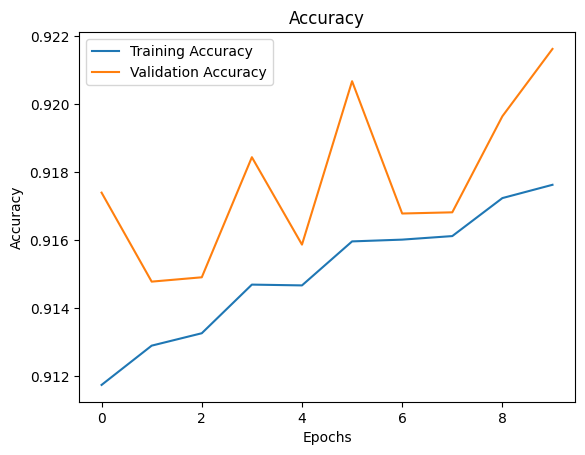

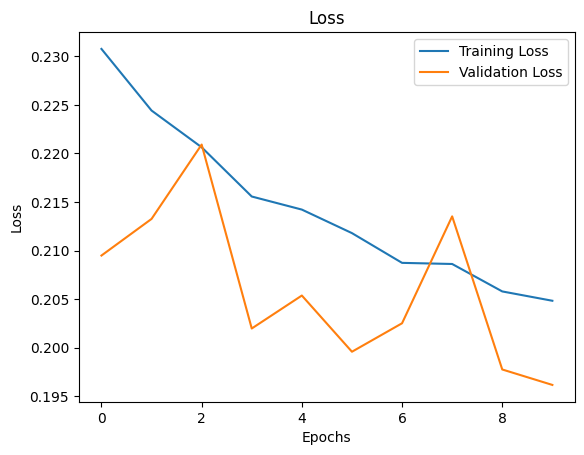

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:

print('Test accuracy:', accuracy * 100, '%')

predictions = model.predict(X_test)
actual_values = y_test

print("First 10 predictions:")
print(predictions[:10])

print("\nFirst 10 actual values:")
print(actual_values[:10])


Test accuracy: 91.43320918083191 %
2697/2697 [==============================] - 14s 5ms/step
First 10 predictions:
[[1.13488222e-05 3.18669038e-08 2.86986013e-09 1.72316017e-09
  4.35275549e-09 1.08791066e-11 6.33946368e-11 1.61312088e-14
  3.17157246e-05 4.53128273e-08 4.26759125e-19 1.31298509e-06
  1.09303892e-05 7.81285030e-13 7.59592389e-09 1.23892883e-14
  1.34035627e-09 9.99944568e-01]
 [3.76610296e-05 4.79072105e-06 2.01568037e-05 3.39386565e-06
  8.61992359e-01 3.02701579e-08 6.73741715e-06 4.48156516e-06
  4.39089945e-06 1.37425527e-01 2.47374777e-11 4.05243860e-04
  2.16583649e-05 1.59102490e-06 6.80464325e-08 1.17440250e-05
  3.76346543e-06 5.64155234e-05]
 [2.45442749e-07 7.18249510e-07 1.18599601e-08 7.10843995e-10
  2.31557124e-07 5.08166697e-13 4.32286074e-09 2.24901976e-12
  8.35504999e-09 4.32671726e-07 2.32062714e-13 9.99997497e-01
  1.22860669e-07 2.09486985e-12 4.81275401e-11 5.21535202e-12
  3.37600653e-07 4.03587165e-07]
 [2.42803168e-07 7.32946830e-07 1.21103110

In [ ]:

max_indices = np.argmax(predictions[:10], axis=1)

print("Indices of maximum values in the first 10 predictions:")
print(max_indices)


Indices of maximum values in the first 10 predictions:
[17  4 11 11  0  4 11  4 17  2]


In [ ]:
max_indices_list = max_indices.tolist()
print(max_indices_list)

[17, 4, 11, 11, 0, 4, 11, 4, 17, 2]


In [ ]:
encoded_labels = {
    0: 'UDP',
    1: 'MSSQL',
    2: 'Benign',
    3: 'Portmap',
    4: 'Syn',
    5: 'NetBIOS',
    6: 'UDPLag',
    7: 'LDAP',
    8: 'DrDoS_DNS',
    9: 'UDP-lag',
    10: 'WebDDoS',
    11: 'TFTP',
    12: 'DrDoS_UDP',
    13: 'DrDoS_SNMP',
    14: 'DrDoS_NetBIOS',
    15: 'DrDoS_LDAP',
    16: 'DrDoS_MSSQL',
    17: 'DrDoS_NTP'
}
predicted_indices = max_indices_list
print("First 10 detected attacks")
for index in predicted_indices:
    if  index == 2:
        print("Not an attack")
    else:
        print("The Attack: ",encoded_labels[index])

First 10 detected attacks
The Attack:  DrDoS_NTP
The Attack:  Syn
The Attack:  TFTP
The Attack:  TFTP
The Attack:  UDP
The Attack:  Syn
The Attack:  TFTP
The Attack:  Syn
The Attack:  DrDoS_NTP
Not an attack


In [ ]:
model.save('/content/drive/MyDrive/final_proj_mar_13/ddos_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2697/2697 [==============================] - 14s 5ms/step


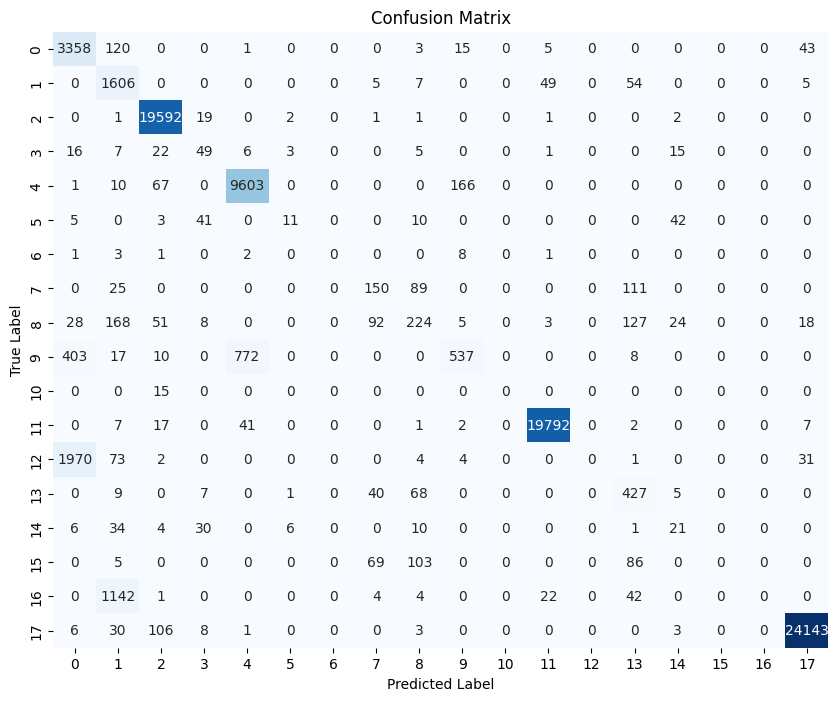

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(model.predict(X_test), axis=-1)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.58      0.95      0.72      3545
           1       0.49      0.93      0.64      1726
           2       0.98      1.00      0.99     19619
           3       0.30      0.40      0.34       124
           4       0.92      0.98      0.95      9847
           5       0.48      0.10      0.16       112
           6       0.00      0.00      0.00        16
           7       0.42      0.40      0.41       375
           8       0.42      0.30      0.35       748
           9       0.73      0.31      0.43      1747
          10       0.00      0.00      0.00        15
          11       1.00      1.00      1.00     19869
          12       0.00      0.00      0.00      2085
          13       0.50      0.77      0.60       557
          14       0.19      0.19      0.19       112
          15       0.00      0.00      0.00       263
          16       0.00      0.00      0.00      1215
          17       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
